# COMP1008 2021/22 Coursework - Predicting Salaries based on Census Data
<b>Student Name</b>: Daniel Hartgrove<br>
<b>Student ID</b>: 20331452

## Task description

Based on the census data from 9k people, build machine learning models to predict people's salary. Analyse the machine learning models in supporting better decision making.<br>
    - <b>Dataset</b>: <a href="https://moodle.nottingham.ac.uk/pluginfile.php/7527571/mod_tabbedcontent/tabcontent/26383/data-Salaries.xlsx">data-Salaries.xlsx</a>, available in Moodle COMP1008 page ('Course Content / Assessment'); Coursework issue <a href="https://moodle.nottingham.ac.uk/pluginfile.php/7527571/mod_tabbedcontent/tabcontent/26383/202122%20Assessment%20Sheet%20COMP1008.pdf?time=1645773629043">form</a>.<br>
    - Create a Jupyter Notebook file named '202122COMP1008cw-XXX.ipynb' (XXX is your username), using this Jupyter Notebook file as the template.<br>
    - Write your report answering the below questions supported by the source codes displaying the corresponding plots or results.<br>
    - Please check the detailed instructions at the end of this template file.

## Question 1. Data Analysis and Preparation [30 marks]

Import relevant libraries, and the datafile <a href="https://moodle.nottingham.ac.uk/pluginfile.php/7527571/mod_tabbedcontent/tabcontent/26383/data-Salaries.xlsx">data-Salaries.xlsx</a> to asnwer the following questions.<br>
Display your code which produces the results or the appropriate plottings to support your answers to the following questions.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Create Data Frame
salaries_df = pd.read_excel("data/data-Salaries.xlsx")
salaries_df

,age,class,education,edu_no,marital,occupation,relationship,race,gender,hr_wk,salary
0,25,1.0,11,7,Never-married,8.0,Own-child,Black,Male,40,<=50K.
1,38,1.0,2,9,Married-civ-spouse,10.0,Husband,White,Male,50,<=50K.
2,28,5.0,4,12,Married-civ-spouse,13.0,Husband,White,Male,40,>50K.
3,44,1.0,8,10,Married-civ-spouse,8.0,Husband,Black,Male,40,>50K.
4,34,1.0,10,6,Never-married,3.0,Not-in-family,White,Male,30,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...
9386,40,1.0,2,9,Married-civ-spouse,7.0,Husband,White,Male,45,>50K.
9387,22,1.0,15,13,Married-civ-spouse,6.0,Wife,White,Female,40,<=50K.
9388,21,1.0,8,10,Never-married,5.0,Own-child,White,Male,25,<=50K.
9389,72,2.0,11,7,Married-civ-spouse,2.0,Husband,White,Male,20,<=50K.


<b>Question 1a</b> (6 marks)<br>
    - What's the largest age group (e.g. 20-30 yrs old, 30-40 yrs old, etc.) in the data set? i.e. in which age group there are most people.<br>
    - How long do most people work per week (e.g. 10-20 hrs per week, 20-30 hrs per week, etc.)?

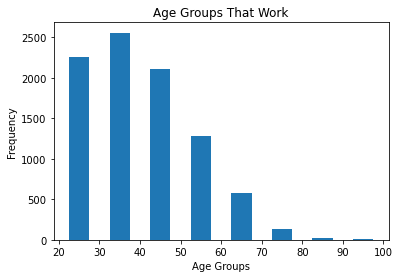

In [3]:
# Part 1 - age group
plt.hist(salaries_df['age'], cumulative = False, bins= [20, 30, 40, 50 ,60 ,70 ,80, 90, 100], rwidth=0.5, align = 'mid', label= 'age')
plt.title('Age Groups That Work')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()


- The largest age group is 30-40 years old
</hr>

Text(0, 0.5, 'People working in the range')

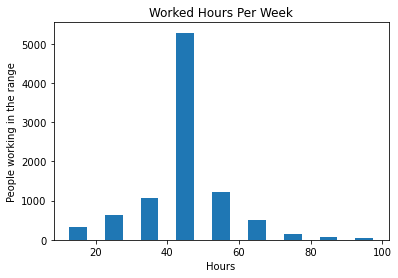

In [4]:
# Part 2 - hours
plt.hist(salaries_df['hr_wk'], bins= [10 ,20, 30, 40, 50 ,60 ,70 ,80, 90, 100], rwidth=0.5)
plt.title('Worked Hours Per Week')
plt.xlabel('Hours')
plt.ylabel('People working in the range')

- Most people work between 40 and 50 hours a week, but this is because most people work 40 hours a week. My histogram takes the lower bound at 40. 
- I tested this by also plotting a histogram with bins range = [10 ,20, 30, 41, 50 ,60 ,70 ,80, 90, 100]

<b>Question 1b</b> (9 marks)<br>
    - On average, do female or male work longer hours per week (feature "hr_wk")?<br>
    - In which marital status (feature "marital"), on average, do male work the longest hours per week ("hr_wk")?<br>
    - On average, which working class (feature "class") is the oldest population? Are these people working the shortest hours per week?

In [5]:
# Part 1 - gender
gender_df = salaries_df.groupby("gender")
mean_df = gender_df.mean()
mean_df.head().sort_values(['hr_wk'])

,age,class,education,edu_no,occupation,hr_wk
gender,,,,,,
Female,37.127742,1.818974,7.470645,10.196129,5.874112,36.829677
Male,39.493403,1.767298,7.401208,10.245271,5.653094,43.107137


- On average, Males work more hours a week

In [6]:
#Part 2 - marital status of males
data = []
indexFemale = salaries_df[ salaries_df['gender'] == "Female" ].index
new_df = salaries_df.copy()
new_df.drop(indexFemale , inplace=True)
new_df.groupby(['marital']).mean().sort_values(['hr_wk'])

,age,class,education,edu_no,occupation,hr_wk
marital,,,,,,
Married-AF-spouse,31.000000,1.000000,8.000000,10.000000,2.000000,28.000000
Never-married,28.387597,1.576119,7.395945,10.026834,5.591642,38.916518
Widowed,59.500000,1.890625,6.750000,9.906250,5.796875,40.156250
Married-spouse-absent,42.525000,1.600000,6.750000,10.225000,5.675000,41.450000
Divorced,42.356190,1.699048,7.045714,10.135238,5.569524,43.156190
Separated,37.983471,1.694215,5.834711,9.495868,5.644628,43.752066
Married-civ-spouse,43.612218,1.861694,7.518250,10.384416,5.689718,44.969454


- As the table shows, the marital group with the highest hours a week is "Married-civ-spouse"

In [7]:
#Part 3 - working class
class_df = salaries_df.copy()
class_df.replace(to_replace = np.nan, value = 0)
class_df.groupby(['class']).mean().sort_values(['age'])

,age,education,edu_no,occupation,hr_wk
class,,,,,
8.0,17.000000,11.000000,7.000000,NaN,20.000000
1.0,37.025951,7.159098,10.009142,5.572103,40.365674
6.0,39.378685,9.047619,11.356009,6.496599,38.616780
5.0,41.300000,8.786567,10.979104,6.889552,40.516418
4.0,42.707904,7.780069,10.731959,6.752577,41.807560
3.0,44.752022,8.237197,11.210243,5.056604,47.649596
2.0,45.930909,7.156364,10.238788,5.569697,45.084848
7.0,51.600000,3.400000,8.600000,6.400000,35.000000


- As the table shows, class 7.0 has the oldest working population. These people are working the shortest hours per week because we cannot consider class 8.0 (unemployed) as working. Coincidentally, class 7.0 also have the lowest class of education.

<b>Question 1c</b> (15 marks)<br>
Use approporate functions in pandas and/or matplotlib libraries to analyse the dataset.<br>
For building machine learning models:<br>
    - What issues do you observe in which of the input features and/or output data? What would happen if the data is not pre-processed properly?<br>
    - How do you pre-process the data to address these issues? Brielfy explain the data and the parameters for the functions you used to reveal and address the issues.<br>
    - Brielf explain the prepared the data (what are the input and output data and their types) for building the models in Questions 2 - 3.

In [8]:
# dropping the columns we have not proven or justified we need to look at...
new_salaries_df = salaries_df.drop(columns = ['relationship', 'race'] )
# I have dropped these columns are there is no real way to determine a numerical relationship in data of the average occupation
# of a group as there is no way to know what these occupations are. There is no way to order relationship, race or marital status in numerically mapped values.
print(new_salaries_df['marital'].unique())
# cleaning the data so that a model can understand
new_salaries_df['salary'] = new_salaries_df['salary'].map({'<=50K.':0, '>50K.':1})
new_salaries_df['gender'] = new_salaries_df['gender'].map({'Male':0, 'Female':1})
new_salaries_df['class'] = new_salaries_df['class'].map({np.nan : 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0:5, 6.0: 6, 7.0 : 7, 8.0 : 8})
new_salaries_df['marital'] = new_salaries_df['marital'].map({'Married-civ-spouse' : 1, 'Never-married': 0, 'Widowed' : 2, 'Separated': 3, 'Divorced': 4, 'Married-spouse-absent' :5, ' Married-AF-spouse': 6})
new_salaries_df['occupation'] = new_salaries_df['occupation'].map({np.nan : 0, 1.0 : 1, 2.0: 2, 3.0:3,4.0:4,5.0:5,6.0:6,7.0:7,8.0:8,9.0:9,10.0:10,11.0:11,12.0:12,13.0:13,14.0:14})
new_salaries_df


['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' ' Married-AF-spouse']


,age,class,education,edu_no,marital,occupation,gender,hr_wk,salary
0,25,1,11,7,0,8,0,40,0
1,38,1,2,9,1,10,0,50,0
2,28,5,4,12,1,13,0,40,1
3,44,1,8,10,1,8,0,40,1
4,34,1,10,6,0,3,0,30,0
...,...,...,...,...,...,...,...,...,...
9386,40,1,2,9,1,7,0,45,1
9387,22,1,15,13,1,6,1,40,0
9388,21,1,8,10,0,5,0,25,0
9389,72,2,11,7,1,2,0,20,0


#### What issues do you observe in which of the input features and/or output data? What would happen if the data is not pre-processed properly?

- Some of the Data has values such as NaN which is a null value. This cannot be handled by a linear regression model or machine learning algorithm. If the data was not preprocessed then the models would not be correctly trained and may even break. This can be changed by either deletion of the record as a null value or through mathematical process, replacing it. 
- There are some other parts of the data that are in the wrong format to be handled by a machine learning algorithm, notably string values. Categorical data in the form of a dummy value can be misread and should probably be changed in order for the process to work correctly.  The machine learning methods would otherwise not be able to read them and would return an error or break.


#### How do you pre-process the data to address these issues? Brielfy explain the data and the parameters for the functions you used to reveal and address the issues.

- We need to replace null values with actual values to represent null of the correct type, personally, I changed all ints to zero and all strings to '0'. This can be done using the df.map() function which takes in a series of values to map and what it is mapped to. I also dropped the columns 'relationship', 'occupation' and 'race' as ultimately these will not be needed. My justification for this is that there is no way to mathematically represent an average relationship status or an average occupation with the seemingly arbitrary values that they have been given, with no explaination.
- I changed any set of data that had a set of values of type string to instead consist of those types of data in int form, sorting marital statuses into a group of 0 to 6, and below 50k earnings as -1 and above 50k as 1. I also changed male to be 0 and female to be 1. I did this using the map function which takes in a dictionary of the values to map, and their values to map to. For example: `map({'Male':0, 'Female':1})`
- I noted that I would also need to create a new data frame for the next set of questions which did not contain salary, or else the model would find the best regression between x and itself (in theory). I did this by setting a variable = to df.drop['salary'] and then processing this new data frame instead.


#### Briefly explain the prepared the data (what are the input and output data and their types) for building the models in Questions 2 - 3.

- The new data consists entirely of integer values to represent the strings or exactly what is being shown. The input data will always be these integer values as a consequence. The Linear regression model will need to be trained on the set of these values as relevant to the model, likely having component x be the whole data frame (without 'salaries) and y being just 'salaries'.
- The output data will vary between the models, but generally speaking there will either be a graph produced with values to represent how well the correlation is and how well the model is trained for question 2. Visually, Question 3 will produce a tree of all of the given outcomes.


## Question 2. Linear Regression [20 marks]

<b>Question 2a.</b> (5 marks) <br>
Build a linear regression model to predict people's salary. Briefly explain the parameters in the functions used.<br>
Explain breifly what input features and target output/labels are used in the training. What are the types of the input features?

The linear regression function learned between x an y is: y =  -0.35065725857557956  +  [0.05884437]  * x
0.16898746856065675
Which cross evaluates to: [0.17541881 0.16374455 0.16432744 0.16689758 0.1759918  0.1660755
 0.1636748  0.16491168 0.179577   0.16442313]  with a mean cross score of: 0.1685042284898125 and a standard deviation of:  0.005726663255223175


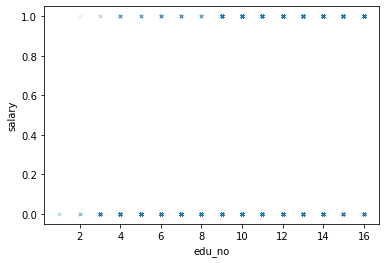

In [9]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# x is the input, and what we are training to find a relationship from. We try different sets of
# values until we find one appropriate

x = new_salaries_df['edu_no']
x = np.asarray(x)
pd.to_numeric(x)
X = x[:, np.newaxis]

#y is the output, and what we are trying to predict. Therefore, Y will always be the salaries.
y = new_salaries_df['salary']

plt.scatter(x, y, s=10, marker='x', alpha=0.1)
# alpha helps me to see grouping in the data
plt.xlabel('edu_no')
plt.ylabel('salary')

#given a new x value, can the y value be predicted?
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
linreg = LinearRegression()
linreg.fit(x_train, y_train)
print('The linear regression function learned between x an y is: y = ', linreg.intercept_, ' + ', linreg.coef_, ' * x')

y_pred = linreg.predict(x_test)
print(metrics.mean_squared_error(y_test, y_pred))

linreg1 = LinearRegression()
print("Which cross evaluates to:", cross_val_score(linreg1, X, y, cv=10, scoring='neg_mean_squared_error')*-1 , " with a mean cross score of:", cross_val_score(linreg1, X, y, cv=10, scoring='neg_mean_squared_error').mean()*-1, "and a standard deviation of: ", cross_val_score(linreg1, X, y, cv=10, scoring='neg_mean_squared_error').std())

- The model takes in the values in the data frame column specified ('edu_no') and also takes in the values from the 'salary' column as y. To help visualise, it outputs this as a scatter graph using the function plt.scatter() which takes in the aforementioned columns and then a parameter for an alpha value which helps me to see overlapping plots based on density.
- The actual training of the model takes these series 'edu_no' and 'salary', before making a linearRegression object and making them fit. The object then is able to predict the values of y and tell you how accurate it was. The whole function returns what the function learned was, the mean squared error and the cross evaluation score.

<b>Question 2b.</b> (5 marks) <br>
Show the code which evaluates the trained linear regression model, and explain the parameters used in the function.<br>
What does your evaluation mean in terms of predicting salaries? Is this a good model for future prediction?

In [10]:
y_pred = linreg.predict(x_test)
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))

linreg1 = LinearRegression()
print("Which cross evaluates to: ", cross_val_score(linreg1, X, y, cv=10, scoring='neg_mean_squared_error')*-1 , "with a mean cross score of:", cross_val_score(linreg1, X, y, cv=10, scoring='neg_mean_squared_error').mean()*-1, "and a standard deviation of:", cross_val_score(linreg1, X, y, cv=10, scoring='neg_mean_squared_error').std())
linreg1

Mean Squared Error:  0.16898746856065675
Which cross evaluates to:  [0.17541881 0.16374455 0.16432744 0.16689758 0.1759918  0.1660755
 0.1636748  0.16491168 0.179577   0.16442313] with a mean cross score of: 0.1685042284898125 and a standard deviation of: 0.005726663255223175


LinearRegression()

- The cross_val_score function is used here to score the model. It takes in the model lr1 as the evaluator, a fresh LinearRegression object. It also takes in x and y again as defined earlier, these being the data to fit and the target data respectively. cv is the cross fold score which means that in my case the model is split 10 times. The value of scoring tells the function what method to use when returning the score.
- The code has a mean squared error of approximately 0.75 (on average) where the best value is 0.0. This suggests to me that actually the model is wildly inaccurate and therefore is likely not a good model for future prediction, despite the high cross evaluation score.

<b>Question 2c.</b> (5 marks)<br>
Study the coefficients found in the trained model.<br>
Which three features are the most important to predict people's salary?<br>
Are these three important features reliable predicting people's salary? Why?

In [11]:
print('The linear regression function learned between x an y is: y = ', linreg.intercept_, ' + ', linreg.coef_, ' * x')

The linear regression function learned between x an y is: y =  -0.35065725857557956  +  [0.05884437]  * x


- coef for edu_no: 0.11886188, cross eval:  0.67401691395925
- coef for class: 0.04038983, cross eval: 0.7491811377673281
- coef for marital: 0.05790398, cross eval: 0.19251625
- coef for education: 0.03513384, cross eval: 0.7268566163666454
- coef for hr_wk: 0.01587986, cross eval: 0.7166390277235959
- coef for age: 0.01449842, cross eval:  0.7132771861993035
- coef for occupation: -0.00438424, cross eval: 0.18597919746645186
- coef for gender: -0.4052586, cross eval: 0.7194483297449479

- marital has the highest coefficient
- gender has the lowest coefficient
- edu_no, class and education appear to be the most important factors in predicting salary. This makes some sense in the idea that if you are better educated you can achieve a higher paying job, and people with a higher class are likely to have better jobs as they need to have a source of income to maintain social status. 
- Going purely from this information it appears that these pieces of data are important, however hr_wk is in the bottom 3 and I would guess that working more hours a week at a lower salary will in most cases earn more money than someone working less hours at a higher salary (10 hours at 20 an hour vs 40 hours at 8 an hour).

<b>Question 2d.</b> (5 marks)<br>
Based on the above analysis, breifly explain if linear regression is a good machine learning model for this task.

- Because the data lines up with real world heuristics, It can be seen as somewhat accurate.
- It always (except for in the case of 'marital status' and 'occupation') cross evaluates to above 0.5 which means it is better than a random guess for most cases.
- However, I do not believe it is truly accurate or a good model for this task as essentially a linear regression model is just a line of best fit and in the case of my data set, the values of outcome are either -1 or 1 and therefore a line of best fit would have to be 'made to fit'. As I mentioned earlier, there is also an approximately 75% mean squared error in each of the values. This both provides evidence that the line of best fit doesn't work for binary values and that this is not a good model for this task.

## Question 3. Decision Tree [35 marks]

<b>Question 3a.</b> (2 marks)<br>
Build a decision tree to predict people's salaries. Briefly explain the data used in the training.

[Text(502.20000000000005, 733.86, 'marital <= 0.5\ngini = 0.375\nsamples = 4695\nvalue = [3520, 1175]\nclass = <=50k'),
 Text(251.10000000000002, 570.78, 'age <= 33.5\ngini = 0.091\nsamples = 1531\nvalue = [1458, 73]\nclass = <=50k'),
 Text(125.55000000000001, 407.70000000000005, 'edu_no <= 12.5\ngini = 0.042\nsamples = 1153\nvalue = [1128, 25]\nclass = <=50k'),
 Text(62.775000000000006, 244.62, 'occupation <= 6.5\ngini = 0.013\nsamples = 911\nvalue = [905, 6]\nclass = <=50k'),
 Text(31.387500000000003, 81.54000000000008, 'gini = 0.024\nsamples = 498\nvalue = [492, 6]\nclass = <=50k'),
 Text(94.16250000000001, 81.54000000000008, 'gini = 0.0\nsamples = 413\nvalue = [413, 0]\nclass = <=50k'),
 Text(188.32500000000002, 244.62, 'age <= 26.5\ngini = 0.145\nsamples = 242\nvalue = [223, 19]\nclass = <=50k'),
 Text(156.9375, 81.54000000000008, 'gini = 0.073\nsamples = 132\nvalue = [127, 5]\nclass = <=50k'),
 Text(219.71250000000003, 81.54000000000008, 'gini = 0.222\nsamples = 110\nvalue = [96,

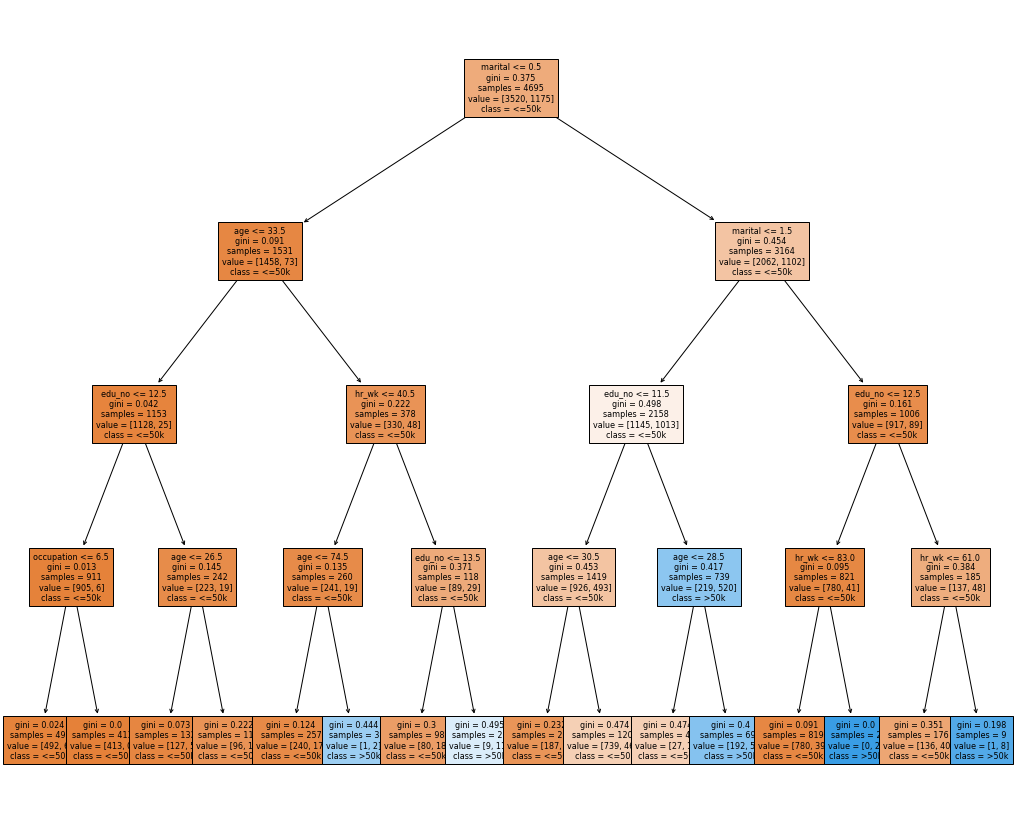

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as a
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

newer_salaries_df = new_salaries_df.copy()
# x is the input, and what we are training to find a relationship from. We try different sets of
# values until we find one appropriate
x = new_salaries_df.drop('salary', axis = 1)
#y is the output, and what we are trying to predict. Therefore, Y will always be the salaries.
y = (newer_salaries_df['salary'])

#given a new x value, can the y value be predicted?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

tree_model = DecisionTreeClassifier(max_depth = 4)
tree_model.fit(x_train, y_train)

# print(cross_val_score(tree_model, new_salaries_df, newer_salaries_df, cv=5, scoring='accuracy'))
plt.figure(figsize=(18,15))
tree.plot_tree(tree_model, filled=True, feature_names = ['age','class','education','edu_no','marital','occupation','gender','hr_wk'], class_names = ['<=50k','>50k'] , fontsize=8)

Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.

<b>Question 3b.</b> (2 marks)<br>
Evaluate the decison tree model you built. Show your code to explain if this is a good model of reliable performance predicting salaries.

In [13]:
print("Training accuracy: " , metrics.accuracy_score(y_train, tree_model.predict(x_train)))
print("Testing accuracy: " , metrics.accuracy_score(y_test, tree_model.predict(x_test)))

Training accuracy:  0.8185303514376997
Testing accuracy:  0.8138841567291312


- The accuracy of the training data is very high (approximately 0.81 where the best value is 1) as well as the overall test accuracy being within the same range. This implies that the model is generally considered good and is reliable at predicting salaries.

<b>Question 3c.</b> (8 marks)<br>
Using confusion matrix, analyse the accuracy of the decision tree you trianed.<br>
    - Is your decision tree model better at classifying people with salaries <=50k, or better at classifying people with > 50k?<br>
    - Show the function / technique / matrix you used, and explain the reasons to support your answers.

In [14]:
cm = confusion_matrix(y_test, tree_model.predict(x_test))
print(cm)
print('Over 50k: ', cm[1,1] / (cm[0,1]+cm[1,1]))
print('Under 50k: ', cm[0,0] / (cm[1,0]+cm[0,0]) )

[[3318  188]
 [ 686  504]]
Over 50k:  0.7283236994219653
Under 50k:  0.8286713286713286


- The accuracy of my decision tree shows that it is better at classifying people whose salaries lie under 50k and I have used a confusion matrix to help show and prove this. It had on average an over 82% success rate with under 50k compared to an average 71% success rate with over 50k. While both of these are good, generally speaking the model is better at clarifying those under 50k. I used the confusion matrix printed above and got the results shown above also to determine this result

<b> Question 3d.</b> (12 marks)<br>
Observe your trained tree.<br>
    - What are the most important three features to predict people's salary?<br>
    - Compared with those observed from your linear regression model, which three features are the more reliable predicting people's salary? Breifly expalin your reasons.<br>
    - List the rule(s) you could extract from the tree which classify people who earn >50k.<br>
    - Can you predict if someone who has been married for 6 years can earn <=50k or >50k? How reliable is your predcition, i.e. what's the probability that the prediction is wrong? Brelfy explain the reason to support your answer.

In the below code, class 0 is less than 50k whereas class 1 is above 50k

In [15]:
treetext = tree.export_text(tree_model, feature_names=['age','class','education','edu_no','marital','occupation','gender','hr_wk'])
print(treetext)

|--- marital <= 0.50
|   |--- age <= 33.50
|   |   |--- edu_no <= 12.50
|   |   |   |--- occupation <= 6.50
|   |   |   |   |--- class: 0
|   |   |   |--- occupation >  6.50
|   |   |   |   |--- class: 0
|   |   |--- edu_no >  12.50
|   |   |   |--- age <= 26.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  26.50
|   |   |   |   |--- class: 0
|   |--- age >  33.50
|   |   |--- hr_wk <= 40.50
|   |   |   |--- age <= 74.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  74.50
|   |   |   |   |--- class: 1
|   |   |--- hr_wk >  40.50
|   |   |   |--- edu_no <= 13.50
|   |   |   |   |--- class: 0
|   |   |   |--- edu_no >  13.50
|   |   |   |   |--- class: 1
|--- marital >  0.50
|   |--- marital <= 1.50
|   |   |--- edu_no <= 11.50
|   |   |   |--- age <= 30.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  30.50
|   |   |   |   |--- class: 0
|   |   |--- edu_no >  11.50
|   |   |   |--- age <= 28.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  28.50
|   |   |

- The three most important features are: marital status, years in education and age.
- The rules we can extract from the tree are as shown above:  
    * if you have never married, spent less than 12.5 years in education and are above 74 years old then you will earn over 50k a year
    * if you are 'married-civ-spouse' and have spent longer than 11.5 years in education as someone over the age of 28.5 then you will earn over 50k a year. 
    * if you have been married but not in the category of 'married-civ-spouse' and spent more than 14.5 years in education then you will earn 50k a year.
- There does not appear to be a way to tell who has been married for 6 years, however people that have been married can be predicted with a 54.3% accuracy. This has approximately a 0.457 chance of being wrong as evidenced by the Gini index of 0.457 as stated on the model itself.

<b>Question 3e.</b> (11 marks)<br>
Experiment with different decision trees of different settings and observe their performance.<br>
Which decision tree of what settings (e.g. depth, trained by what k value in k-fold validation, etc.) would you use?<br>
Briefly explain the reasons for your chosen model w.r.t. the accuracy, overfitting, features, true positive and/or true negative.

- I found that using a max depth of 4 provided the most even balance of testing accuracy to training accuracy and was therefore my preferred model to use as otherwise it started to be less accurate when testing. This could show that the data was being overfitted.
- The model showed itself to have an 82% success rate in identifying those earning under 50k and 71% of those earning over 50k, with an approximate testing and training general accuracy of: 
    * Training accuracy 0.810649627263045
    * Testing accuracy: 0.8153747870528109
- and therefore I believe that as this is far better than the 50/50 average guess and makes a suitable model for prediction of salaries.
- While there were definitely false positives and false negatives in my prediction, I calculated from the confusion matrix that I had an approximately 82% success rate in identifying those earning under 50k a year and 71% success rate in identifying those over 50k a year. This is much better than a random guess which led me to believe that it was a good model to use in this way.

## Question 4. Neural Network [10 marks]

<b>Question 4a.</b> (5 marks)<br>
    - Build, train and tune a neural network to predict salaries. Briefly explain the input and output data.<br>
    - What's the best accuracy your ANN could achieve on the testing dataset? Is this a good measure, i.e how relaible is the model for future predictions?

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

y = newer_salaries_df['salary']
x = newer_salaries_df.drop(columns=['salary'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

ann_model = MLPClassifier(hidden_layer_sizes=(150), max_iter=6000)
ann_model.fit(x_train, y_train) 

y_pred = ann_model.predict(x_train)

print('Training accuracy: \t', metrics.accuracy_score(y_train, y_pred))

Training accuracy: 	 0.8224554997717937


- The best accuracy I was able to achieve on the dataset was the accuracy of the current model, which when I tested it came out to 0.824737562756732. This uses 150 layers and 6000 iterations. I found that generally the more layers, the more accurate the model was.

<b>Question 4b.</b> (5 marks)<br>
Compare to the decision tree model you built, is your neural network model better at classifying people with <50k, or better at classifying people with > 50k?<br>
Explain the reasons to support your answers.

In [17]:
cm = confusion_matrix(y_test, ann_model.predict(x_test))
print(cm)
print('Over 50k: ', cm[1,1] / (cm[0,1]+cm[1,1]))
print('Under 50k: ', cm[0,0] / (cm[1,0]+cm[0,0]) )

[[1957  156]
 [ 395  310]]
Over 50k:  0.6652360515021459
Under 50k:  0.8320578231292517


- The accuracy of my model shows that it is better at classifying people whose salaries lie under 50k as I have used a confusion matrix to help tme analyse this. It had on average an over 83% average success rate with under 50k compared to an average 68% success rate with over 50k. While both of these are good, generally speaking the model is better at clarifying those under 50k. I used the data above to help me to confirm my answers.

## Question 5. Summary [5 marks]

With all the above observations from the machine learning models, what would you suggest to do to improve the accuracy in predicting people's salaries?<br>
Provide necessary data analysis if you like to support your suggestion.

- As is with most models, more data means more to train on and therefore a greater overall understanding of the dataset by the model, which leads to generally better predictions and overall better performance. If there is more data to extract patterns from then more patterns are seen.
    * It appears that the ANN model once properly trained is the best model to use for predicting salaries, and this is likely due to the number of hidden neurons which should be less than approximately twice the size of the input layer. I found very little performance improvement after around a value of 150 for the hidden layer size but through copious tests the variation of the training accuracy was quite large. It had an approximate
    * With regards to my decision tree
    * Linear Regression was vastly outperformed by the other models and due to the nature of how it processing the data, is generally not a good model to be used.
- I would suggest because of these statements that you should use an ANN model with 150 as the layer size and 6000 iterations on a data set of larger size and with more comprehensive data.
- I could have also used seeds along with the data to make it repeat a single random state on the data so that the results are consistent, however because data is random I would suggest to someone else that they use averages as a method of displaying results as you could come across a state which is generally quite poorly predicted and itself considered an outlier of the model.


## Appendix. Coursework Instructions

<b>Main tasks</b>: to build and analyse different machine learning models for a classification task. Support of coursework include:
- Lab tutorials on data processing and machine learning models using different functions and methods in Python libraries on different example problems;
- Example code building and analysing machine learning models, referring to content in COMP1008 lecture on “Machine learning”.
- Q&A support for developing three .ipynb projects in the labs to build different models using different functions on example problems.
- In labs and Teams channel 'COMP1008 labs': support of common questions in completing the coursework.

<b>Marks</b>: in total 100 marks (count for 25% in COMP1008), awarded on the basis of:
- knowledge and understanding showed when answering the questions in the Jupyter Notebook file report,
- how informative and well presented your code, visualisations and results are (e.g. necessary labels in plots),
- self-learning ability making use of tutorial materials and online resources,
- problem solving skills to obtain the answers and results,
- concise language in the report, i.e. key details such as parameters, data, etc. for others to repeat your methods and obtain the same results.

<b>Format</b>:
- One single .ipynb file named 202122COMP1008cw-XXX.ipynb, where XXX is your username (e.g. psxyz).<br>
- The .ipynb file should include your code and answers, using the above given .ipynb template (please add cells as needed).
- You could use additional Python libraries as you wish, in addition to the ones demonstrated in the labs.
- There are multiple ways using different functions to do the analysis. These are fine as long as all answers and analysis are supported by the code implemented in Jupyter Notebook, not by using other means (e.g. operations in Excel, or by using other languages, etc.).
- More details are given in the <a href="https://moodle.nottingham.ac.uk/pluginfile.php/7527571/mod_tabbedcontent/tabcontent/26383/202122%20Assessment%20Sheet%20COMP1008.pdf?time=1645773629043">COMP1008 coursework issue form</a>.

<b>Submission</b>: 
- Deadline: 28th March 2022 3pm.
- Late submission leads to a 5% deduction of your coursework mark on each weekday.<br>
Any work submitted one week late will receive a zero mark for the coursework.
- Method: in Moodle submit a single .ipynb file named 202122COMP1008cw-XXX.ipynb, please replace XXX with your username (e.g. psxyz).
- If you can’t submit your coursework on time due to ECs, please contact Student Services and your personal tutor ASAP.

<b>Note: Plagiarism vs. Group Discussions</b> 

As you should know, plagiarism is completely unacceptable and will be dealt with according to University's standard policies.<br>
Students are encouraged to have only general discussions on the theory (not the specific questions) when completing the coursework.<br>
It is important that when you actually do your coursework and write the answers, you do it individually.<br>
Do NOT, under any circumstances, share your report, code or figures, etc. with anyone else.